# Mushroom Classification

In [2]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Load in the dataset

In [3]:
mush = pd.read_csv("Sample-Data-Mushroom-Classification.csv")
mush

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class
0,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,1,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,...,white,white,partial,white,1,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,1,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,1,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,...,white,white,partial,white,1,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,False,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,1,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,False,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,1,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,False,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,1,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,False,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,1,evanescent,white,several,leaves,poisonous


### Describe the dataset

In [4]:
mush.dtypes

CapShape                 object
CapSurface               object
CapColor                 object
Bruises                    bool
Odor                     object
GillAttachment           object
GillSpacing              object
GillSize                 object
GillColor                object
StalkShape               object
StalkRoot                object
StalkSurfaceAboveRing    object
StalkSurfaceBelowRing    object
StalkColorAboveRing      object
StalkColorBelowRing      object
VeilType                 object
VeilColor                object
RingNumber                int64
RingType                 object
SporePrintColor          object
Population               object
Habitat                  object
Class                    object
dtype: object

In [5]:
#change to category so all are same type
mush = mush.astype('category')
mush.dtypes

CapShape                 category
CapSurface               category
CapColor                 category
Bruises                  category
Odor                     category
GillAttachment           category
GillSpacing              category
GillSize                 category
GillColor                category
StalkShape               category
StalkRoot                category
StalkSurfaceAboveRing    category
StalkSurfaceBelowRing    category
StalkColorAboveRing      category
StalkColorBelowRing      category
VeilType                 category
VeilColor                category
RingNumber               category
RingType                 category
SporePrintColor          category
Population               category
Habitat                  category
Class                    category
dtype: object

In [6]:
mush.describe()

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,convex,scaly,brown,False,none,free,close,broad,buff,tapering,...,white,white,partial,white,1,pendant,white,several,woods,edible
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [7]:
mush['VeilType'].describe()

count        8124
unique          1
top       partial
freq         8124
Name: VeilType, dtype: object

In [8]:
#drop VeilType as there is only one option
mush.drop(columns='VeilType',inplace= True)
mush.columns

Index(['CapShape', 'CapSurface', 'CapColor', 'Bruises', 'Odor',
       'GillAttachment', 'GillSpacing', 'GillSize', 'GillColor', 'StalkShape',
       'StalkRoot', 'StalkSurfaceAboveRing', 'StalkSurfaceBelowRing',
       'StalkColorAboveRing', 'StalkColorBelowRing', 'VeilColor', 'RingNumber',
       'RingType', 'SporePrintColor', 'Population', 'Habitat', 'Class'],
      dtype='object')

In [9]:
feats = mush.columns[:-1]
feats

Index(['CapShape', 'CapSurface', 'CapColor', 'Bruises', 'Odor',
       'GillAttachment', 'GillSpacing', 'GillSize', 'GillColor', 'StalkShape',
       'StalkRoot', 'StalkSurfaceAboveRing', 'StalkSurfaceBelowRing',
       'StalkColorAboveRing', 'StalkColorBelowRing', 'VeilColor', 'RingNumber',
       'RingType', 'SporePrintColor', 'Population', 'Habitat'],
      dtype='object')

### Chi2
* check if ccorrelated while still as categorical values

In [10]:
from scipy.stats import chi2_contingency
for f in feats:
    cross_tab=pd.crosstab(index=mush[f],columns=mush['Class'])
    chi2 = chi2_contingency(cross_tab)
    # P-Value>0.05 not correlated
    if chi2[1] > 0.05:
        print(f + ' not correlated')
    else:
        print(f + ' correlated')

CapShape correlated
CapSurface correlated
CapColor correlated
Bruises correlated
Odor correlated
GillAttachment correlated
GillSpacing correlated
GillSize correlated
GillColor correlated
StalkShape correlated
StalkRoot correlated
StalkSurfaceAboveRing correlated
StalkSurfaceBelowRing correlated
StalkColorAboveRing correlated
StalkColorBelowRing correlated
VeilColor correlated
RingNumber correlated
RingType correlated
SporePrintColor correlated
Population correlated
Habitat correlated


### Plot of edible and poisonous

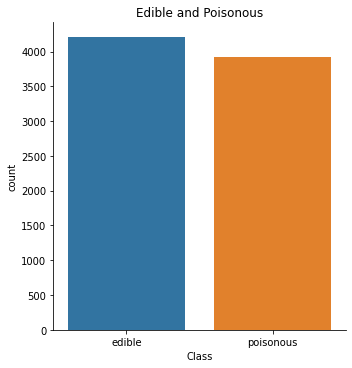

In [11]:
sns.catplot(x="Class", data=mush,kind="count").set(title="Edible and Poisonous")

a good balance between types, no skew either way

In [12]:
edible = mush[mush['Class']=='edible'].reset_index(drop=True)
edible.drop(columns='Class',inplace=True)

#### What do we care about most? Decided on shape, surface, and color of cap, color of veil, odor, and growing habitat

In [13]:
desired = ['CapShape','CapSurface','CapColor','Odor','Habitat','VeilColor','GillColor', 'StalkShape']

In [14]:
#see any categories not inclujded for edible types
for d in desired:
    print(pd.crosstab(index = mush[d], columns = mush['Class']))
    print()

Class     edible  poisonous
CapShape                   
bell         404         48
conical        0          4
convex      1948       1708
flat        1596       1556
knobbed      228        600
sunken        32          0

Class       edible  poisonous
CapSurface                   
fibrous       1560        760
grooves          0          4
scaly         1504       1740
smooth        1144       1412

Class     edible  poisonous
CapColor                   
brown       1264       1020
buff          48        120
cinnamon      32         12
gray        1032        808
green         16          0
pink          56         88
purple        16          0
red          624        876
white        720        320
yellow       400        672

Class     edible  poisonous
Odor                       
almond       400          0
anise        400          0
creosote       0        192
fishy          0        576
foul           0       2160
musty          0         36
none        3408        120
punge

### Explore features of edible mushrooms

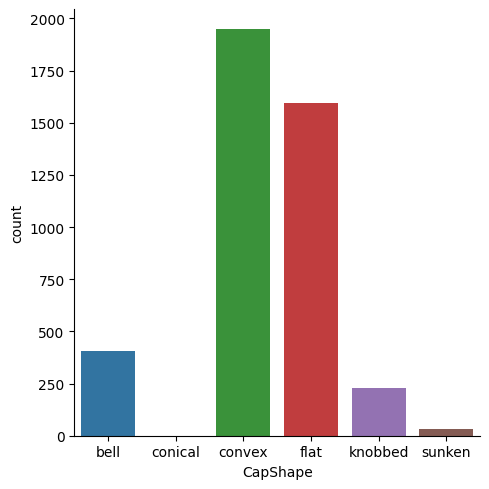

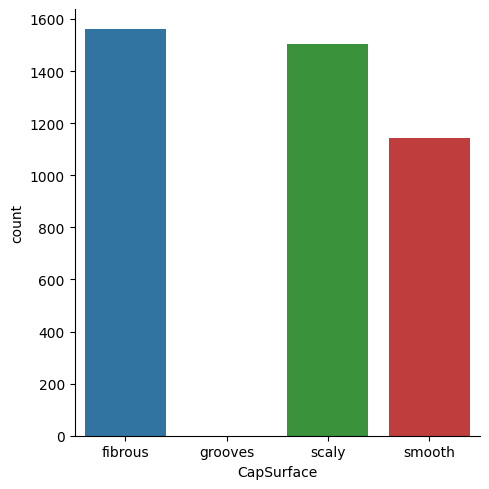

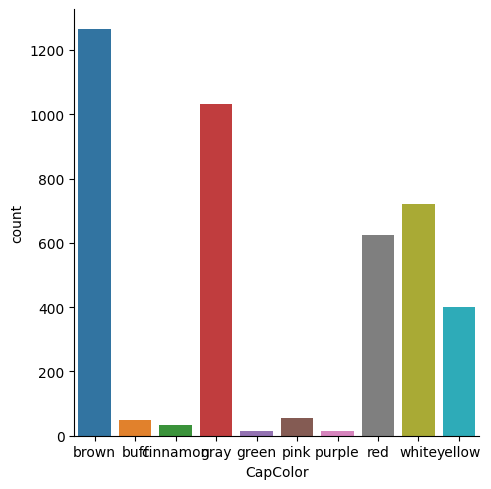

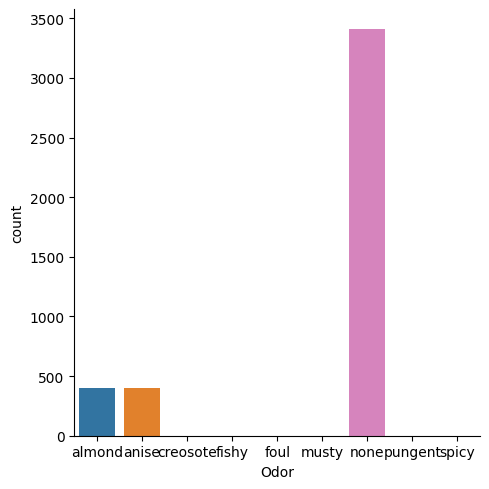

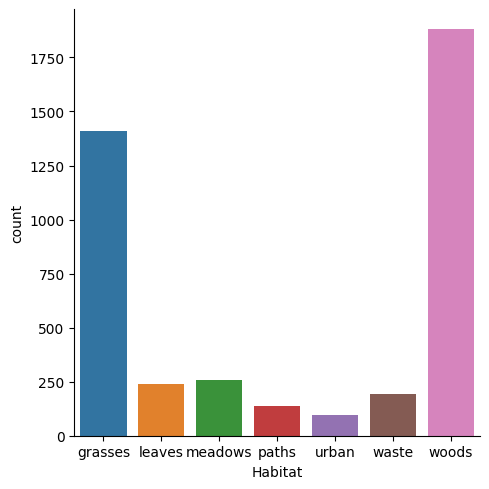

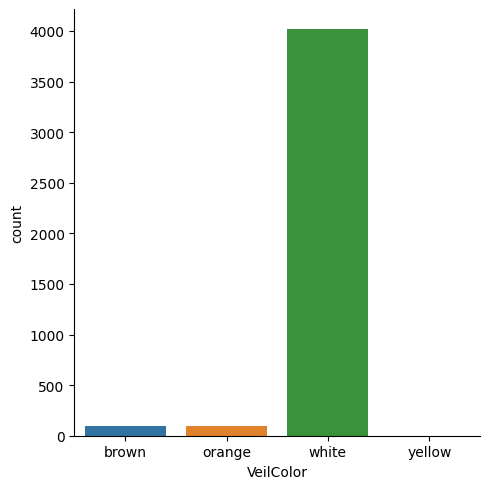

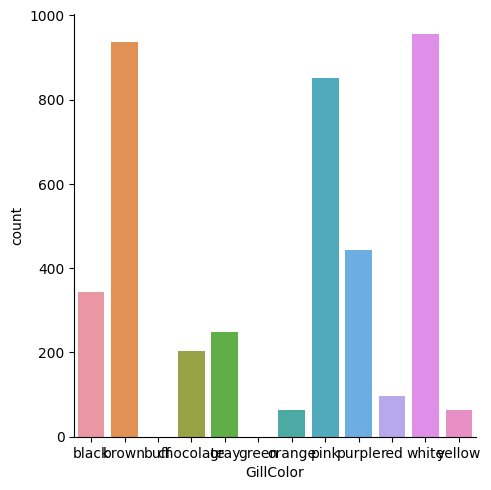

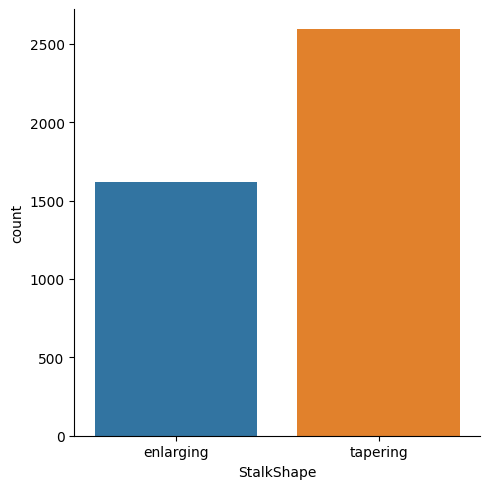

In [15]:
for d in desired:
    sns.catplot(x=d, data=edible,kind = 'count')

visualizations help to weed out unwanted options: no knobbed shape, only smooth surface, no brown or grey to give color diversity, want a pleasent odor to help taste (so no "none"), only want from healthy habitats (no urban, waste, or paths), and pretty veil so no brown

In [16]:
labelencoder=LabelEncoder()
mush_impute = mush.copy()
for column in mush_impute.columns:
    mush_impute[column] = labelencoder.fit_transform(mush_impute[column])
mush_impute

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class
0,2,3,0,1,7,1,0,1,0,0,...,3,7,7,2,1,4,0,3,4,1
1,2,3,9,1,0,1,0,0,0,0,...,3,7,7,2,1,4,1,2,0,0
2,0,3,8,1,1,1,0,0,1,0,...,3,7,7,2,1,4,1,2,2,0
3,2,2,8,1,7,1,0,1,1,0,...,3,7,7,2,1,4,0,3,4,1
4,2,3,3,0,6,1,1,0,0,1,...,3,7,7,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,0,6,0,0,0,11,0,...,3,4,4,1,1,4,2,1,1,0
8120,2,3,0,0,6,0,0,0,11,0,...,3,4,4,0,1,4,2,4,1,0
8121,3,3,0,0,6,0,0,0,1,0,...,3,4,4,1,1,4,2,1,1,0
8122,4,2,0,0,3,1,0,1,2,1,...,2,7,7,2,1,0,7,4,1,1


### Violin Plot
* used to visualize the distribution of the different characteristics 

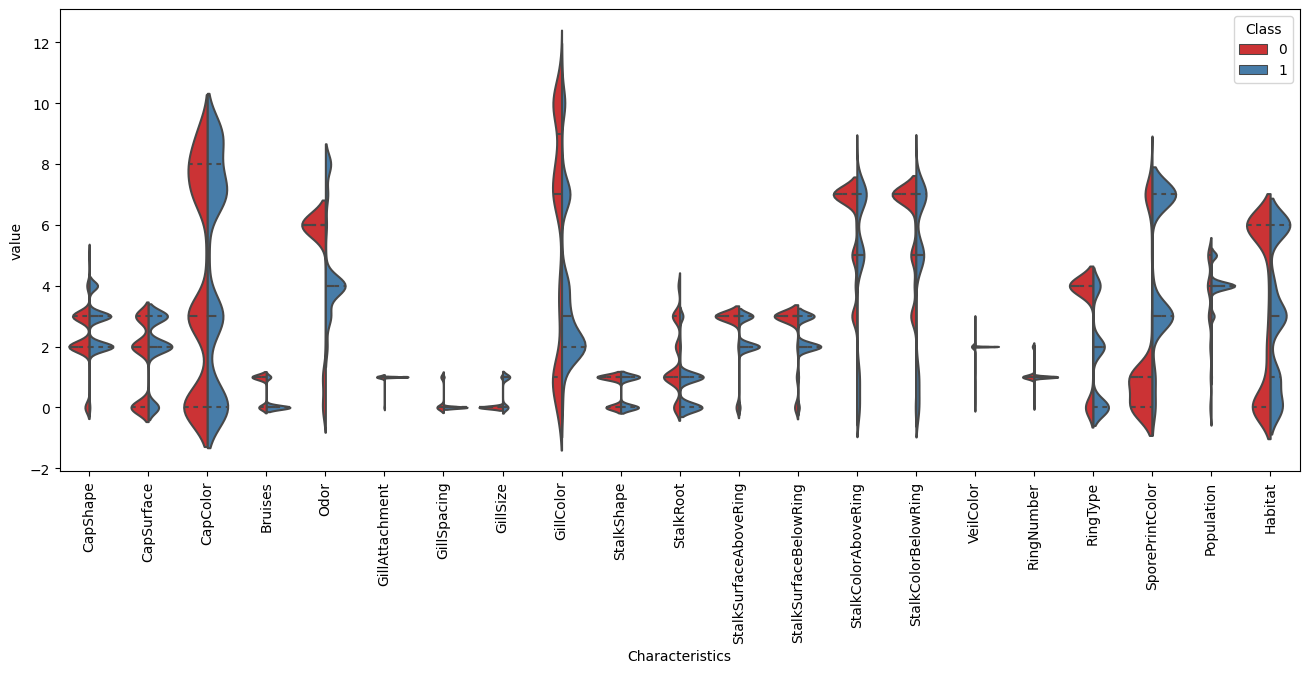

In [17]:
df_div = pd.melt(mush_impute, 'Class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='Class', split = True, data=df_div, inner = 'quartile', palette = 'Set1')
p.set_xticklabels(rotation = 90, labels = list( mush_impute.drop(['Class'],axis = 1)));

In [18]:
X = mush_impute.drop(columns=['Class'])
y = mush_impute['Class']

### Decision Tree
* find the most important features for edible mushrooms

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

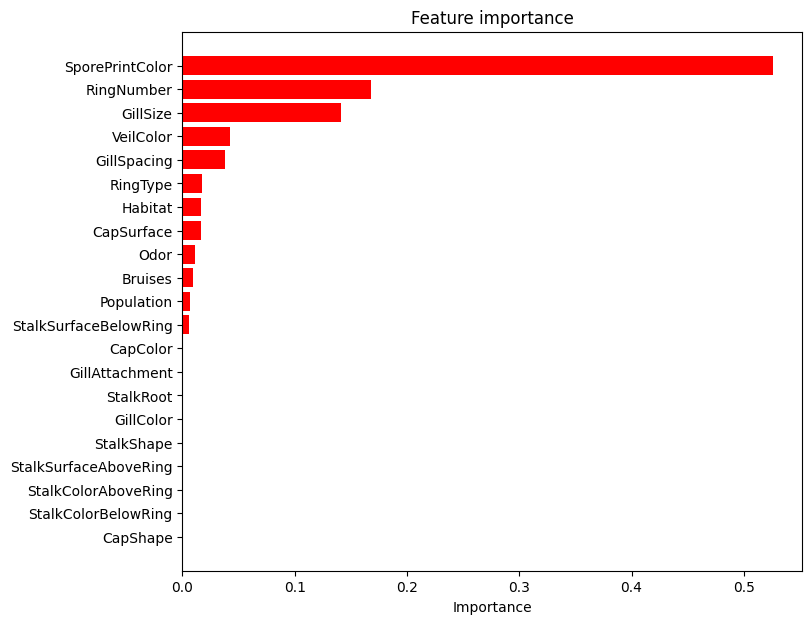

In [20]:
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), feats[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

### Model Fitting

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
 

models = [LogisticRegression(solver="lbfgs", max_iter=500),
         RandomForestClassifier(n_estimators=100, random_state=42),
         GaussianNB()]

for model in models:
    print()
    print(model)   
    model.fit(X, y)
    print("Test Accuracy: {}%".format(round(model.score(X, y)*100, 2)))
    print("Naive Bayes Classifier report: \n\n", classification_report(y, model.predict(X)))


LogisticRegression(max_iter=500)
Test Accuracy: 94.74%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4208
           1       0.96      0.93      0.94      3916

    accuracy                           0.95      8124
   macro avg       0.95      0.95      0.95      8124
weighted avg       0.95      0.95      0.95      8124


RandomForestClassifier(random_state=42)
Test Accuracy: 100.0%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4208
           1       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124


GaussianNB()
Test Accuracy: 85.82%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.88      0.84 

In [22]:
def predict(df, attr):
    preds = []
    for i,row in df.iterrows():
        if row[attr[0]] == 'knobbed':
            preds.append(0)
        else:
            if row[attr[1]] != 'smooth':
                preds.append(0)
            else:
                if row[attr[2]] == 'brown' or row[attr[2]] == 'gray':
                    preds.append(0)
                else:
                    if row[attr[3]] =='none':
                        preds.append(0)
                    else:
                        if row[attr[4]] == 'urban' or row[attr[4]] == 'waste'or row[attr[4]] == 'paths':
                            preds.append(0)
                        else:
                            if row[attr[5]] == 'brown':
                                preds.append(0)
                            else:
                                if row[attr[6]] == 'brown' or row[attr[6]] == 'gray' or row[attr[6]] == 'black':
                                    preds.append(0)
                                else:
                                    preds.append(1)
    return preds

In [23]:
res = predict(edible, ['CapShape','CapSurface','CapColor','Odor','Habitat','VeilColor','GillColor'])

In [24]:
edible['ToCook'] = res
edible

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,ToCook
0,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,...,smooth,white,white,white,1,pendant,brown,numerous,grasses,0
1,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,...,smooth,white,white,white,1,pendant,brown,numerous,meadows,0
2,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,...,smooth,white,white,white,1,evanescent,brown,abundant,grasses,0
3,convex,scaly,yellow,True,almond,free,close,broad,brown,enlarging,...,smooth,white,white,white,1,pendant,black,numerous,grasses,0
4,bell,smooth,white,True,almond,free,close,broad,gray,enlarging,...,smooth,white,white,white,1,pendant,black,numerous,meadows,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,convex,smooth,brown,False,none,attached,close,broad,yellow,enlarging,...,smooth,orange,orange,orange,1,pendant,orange,several,leaves,0
4204,knobbed,smooth,brown,False,none,attached,close,broad,yellow,enlarging,...,smooth,orange,orange,orange,1,pendant,buff,clustered,leaves,0
4205,convex,smooth,brown,False,none,attached,close,broad,yellow,enlarging,...,smooth,orange,orange,brown,1,pendant,buff,several,leaves,0
4206,flat,smooth,brown,False,none,attached,close,broad,brown,enlarging,...,smooth,orange,orange,orange,1,pendant,buff,clustered,leaves,0


In [25]:
edible[edible["ToCook"]==1].shape

(96, 22)

In [26]:
edible_impute = edible.copy()
for column in edible_impute.columns:
    edible_impute[column] = labelencoder.fit_transform(edible_impute[column])
edible_impute

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,ToCook
0,1,2,9,1,0,1,0,0,0,0,...,3,5,5,2,0,2,1,2,0,0
1,0,2,8,1,1,1,0,0,1,0,...,3,5,5,2,0,2,1,2,2,0
2,1,2,3,0,2,1,1,0,0,1,...,3,5,5,2,0,0,1,0,0,0
3,1,1,9,1,0,1,0,0,1,0,...,3,5,5,2,0,2,0,2,0,0
4,0,2,8,1,0,1,0,0,3,0,...,3,5,5,2,0,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,1,2,0,0,2,0,0,0,9,0,...,3,2,2,1,0,2,4,4,1,0
4204,3,2,0,0,2,0,0,0,9,0,...,3,2,2,1,0,2,2,1,1,0
4205,1,2,0,0,2,0,0,0,9,0,...,3,2,2,0,0,2,2,4,1,0
4206,2,2,0,0,2,0,0,0,1,0,...,3,2,2,1,0,2,2,1,1,0


In [27]:
X = edible_impute.drop(columns=['ToCook'])
y = edible_impute['ToCook']

### Decision Tree
* find the most important featues for cooking 

In [28]:
dt.fit(X,y)

DecisionTreeClassifier()

In [29]:
print("Test Accuracy: {}%".format(round(dt.score(X, y)*100, 2)))
print("Naive Bayes Classifier report: \n\n", classification_report(y, dt.predict(X)))

Test Accuracy: 100.0%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4112
           1       1.00      1.00      1.00        96

    accuracy                           1.00      4208
   macro avg       1.00      1.00      1.00      4208
weighted avg       1.00      1.00      1.00      4208



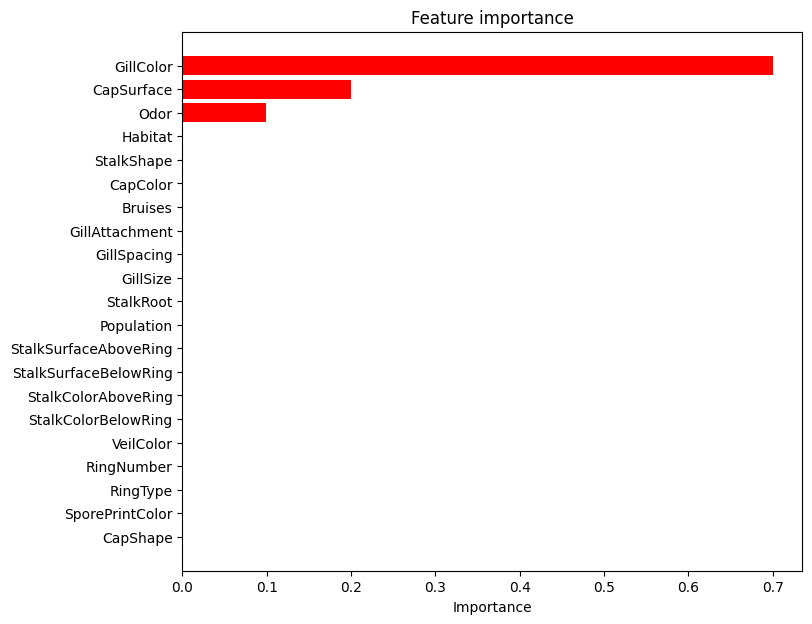

In [30]:
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), edible_impute.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

### Entropy and Information Gain
* measure of impurity in the dataset 
* expected reduction of impurity 

In [31]:
import scipy.stats

def entropy(df, target):
    p = df[target].value_counts()
    entropy = scipy.stats.entropy(p)
    return entropy
def information_gain(df, var, target):
    original_entropy = entropy(df,target)
    values = df[var].unique()
    
    no_split = df[df[var] == values[1]]
    yes_split = df[df[var] == values[0]]
    
    split_entropy = 0
    for subset in [no_split, yes_split]:
        prob = (subset.shape[0] / df.shape[0]) 
        split_entropy += prob * entropy(subset,target)
    
    return original_entropy - split_entropy

In [32]:
for d in desired:
    print('Information Gain of feature:' + d)
    print(information_gain(edible, d, 'ToCook'))

Information Gain of feature:CapShape
0.02870959703960327
Information Gain of feature:CapSurface
0.030436780738145652
Information Gain of feature:CapColor
0.03200921612827348
Information Gain of feature:Odor
0.03903859416607139
Information Gain of feature:Habitat
0.04958022590893025
Information Gain of feature:VeilColor
0.0010780627606880033
Information Gain of feature:GillColor
0.10879619706962834
Information Gain of feature:StalkShape
0.0038093858499570754


In [33]:
coverage = (edible[edible['CapSurface']!='smooth']['ToCook'].count())/edible['ToCook'].count()
coverage*100

72.81368821292776

In [34]:
coverage = (edible[(edible['GillColor']=='brown') | (edible['GillColor'] == 'gray') | (edible['GillColor'] == 'black')]['ToCook'].count())/edible['ToCook'].count()
coverage*100

36.31178707224335

In [35]:
def two_rule(df,rule1,rule2):
    preds=[]
    for i, row in df.iterrows():
        if row[rule1] == 'brown' or row[rule1] == 'gray' or row[rule1] == 'black':
            preds.append(0)
        else:
            if row[rule2] != 'smooth':
                preds.append(0)
            else:
                preds.append(1)
            
    return preds 

In [36]:
edible['TwoRule']=two_rule(edible,'GillColor','CapSurface')
edible[edible["TwoRule"]==1].shape

(632, 23)

In [37]:
edible[edible['TwoRule']==edible['ToCook']].shape

(3672, 23)

In [38]:
count = 0
actual = list(edible['ToCook'])
predicted = list(edible['TwoRule'])
for i in range(len(actual)):
    if actual[i] == 0 and predicted[i] == 0:
        count += 1
    elif actual[i] == 1 and predicted[i] == 1:
        count += 1
accuracy = (count/len(actual))*100
accuracy

87.26235741444867

### Features Visualized 

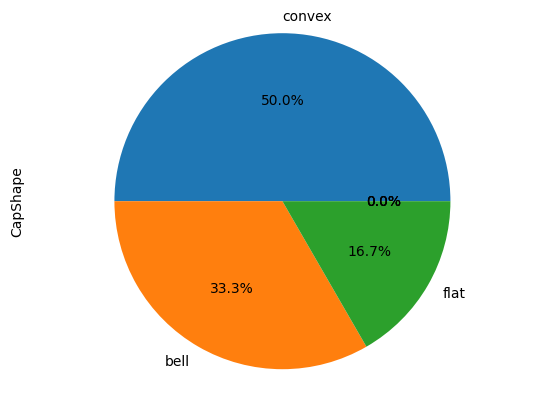

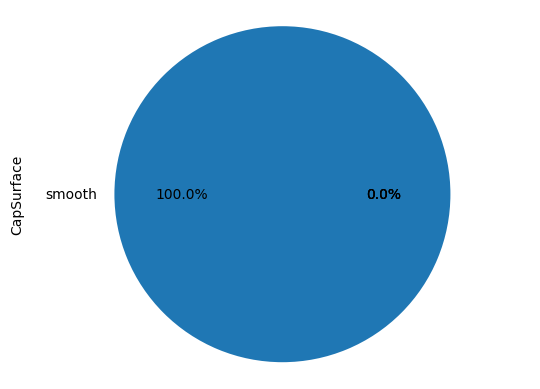

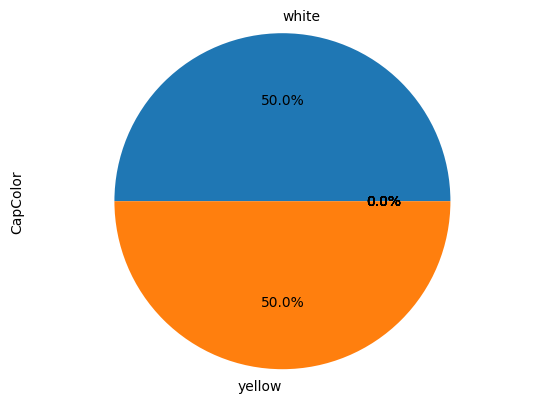

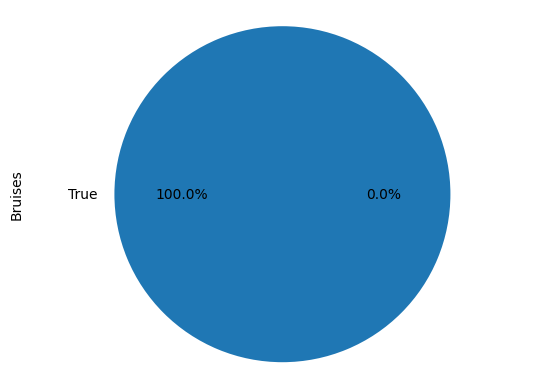

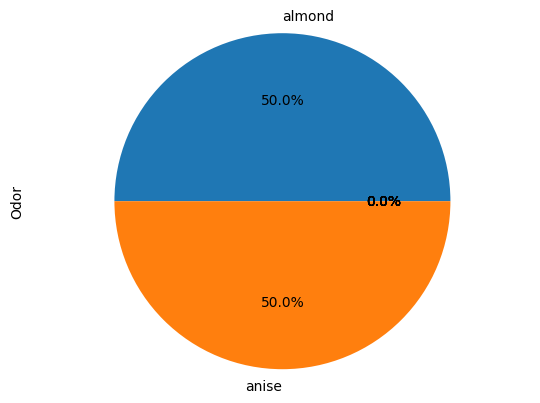

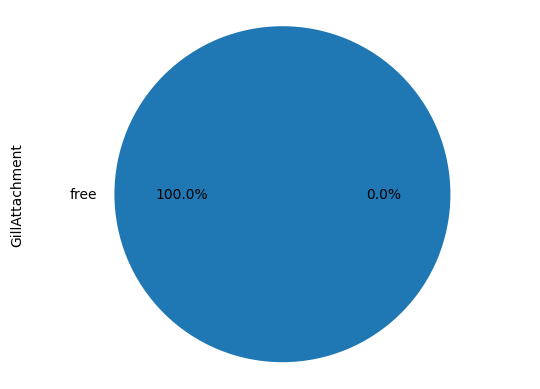

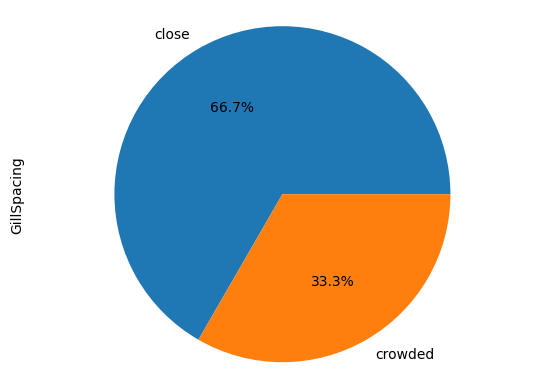

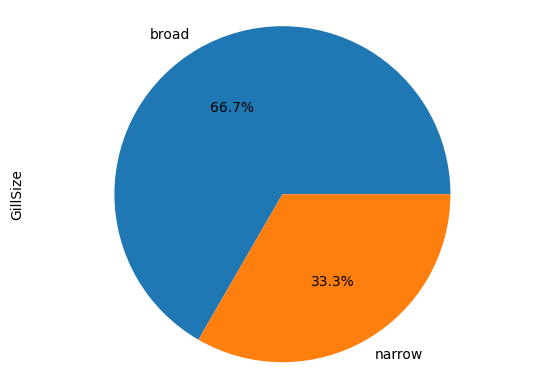

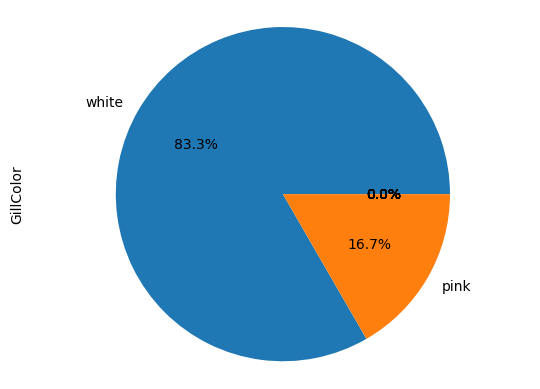

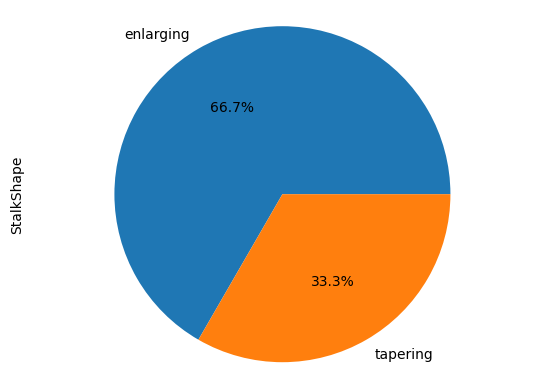

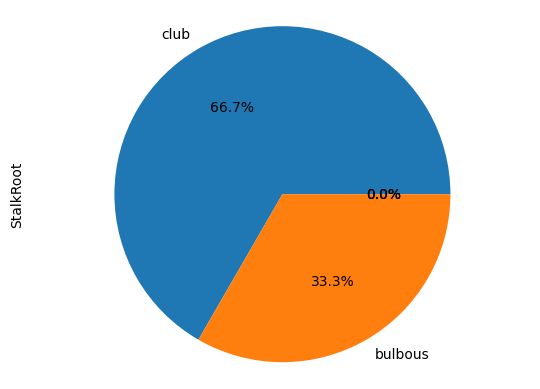

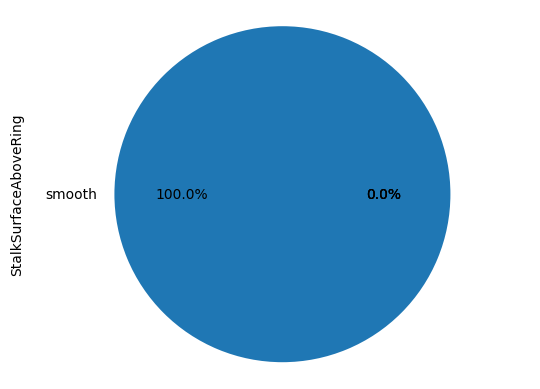

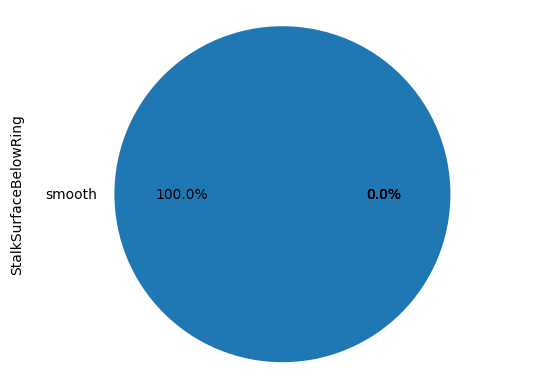

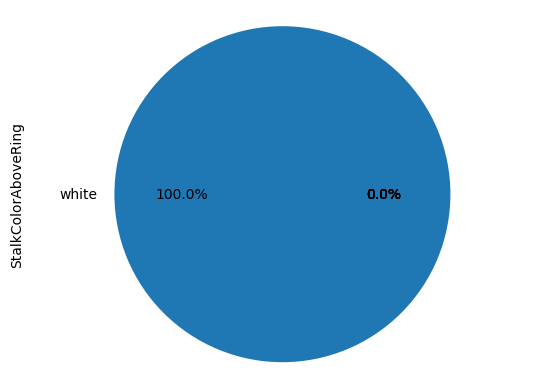

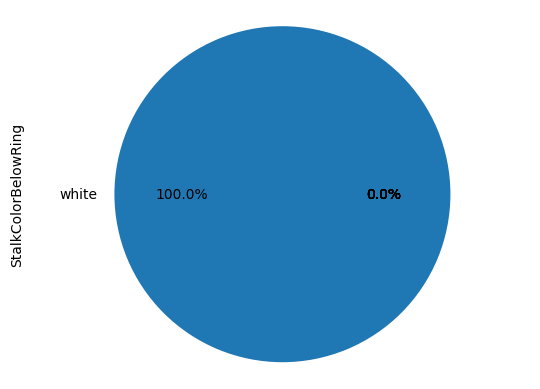

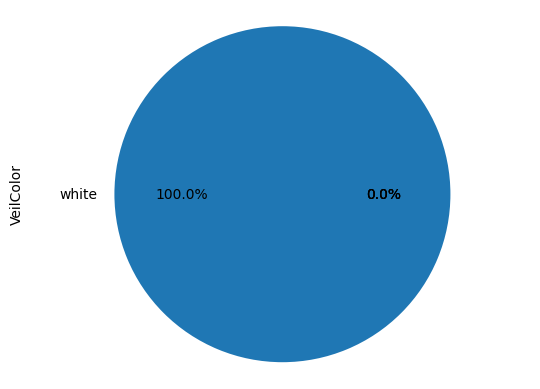

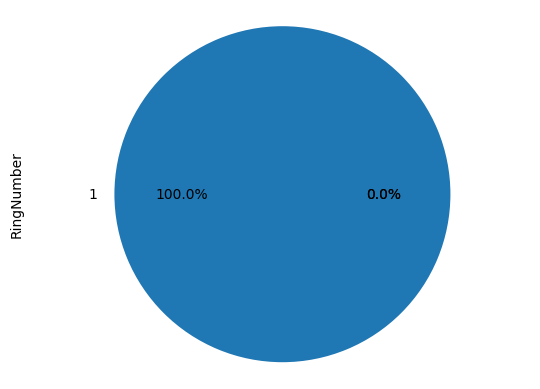

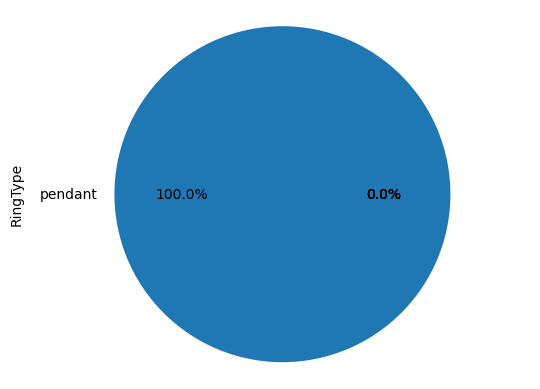

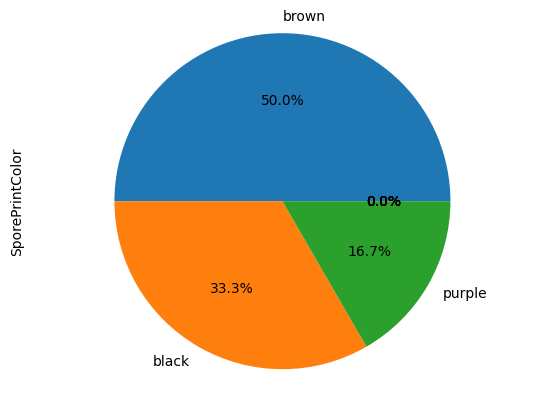

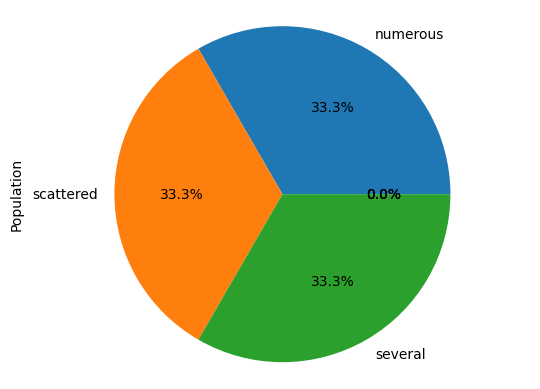

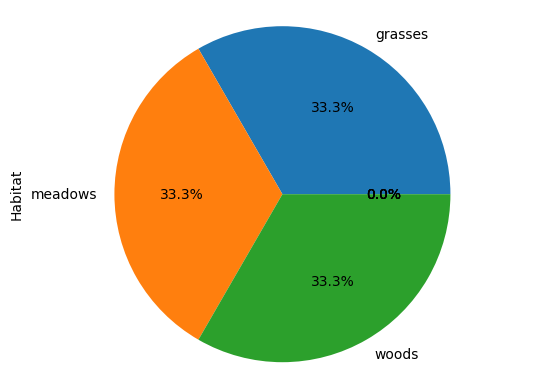

In [39]:
for f in feats:
    ax = edible[edible['ToCook']==1][f].value_counts().plot.pie(autopct='%1.1f%%')
    ax.axis('equal')
    plt.show()

In [40]:
eat_me = edible[edible['ToCook']==1]
eat_me

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkColorAboveRing,StalkColorBelowRing,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,ToCook,TwoRule
9,bell,smooth,yellow,True,almond,free,close,broad,white,enlarging,...,white,white,white,1,pendant,brown,scattered,grasses,1,1
32,convex,smooth,yellow,True,almond,free,close,broad,white,enlarging,...,white,white,white,1,pendant,black,numerous,meadows,1,1
35,convex,smooth,white,True,anise,free,close,broad,white,enlarging,...,white,white,white,1,pendant,brown,numerous,meadows,1,1
43,bell,smooth,white,True,almond,free,close,broad,white,enlarging,...,white,white,white,1,pendant,brown,numerous,grasses,1,1
61,flat,smooth,yellow,True,anise,free,crowded,narrow,pink,tapering,...,white,white,white,1,pendant,brown,several,woods,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,bell,smooth,white,True,almond,free,close,broad,white,enlarging,...,white,white,white,1,pendant,brown,numerous,meadows,1,1
1066,convex,smooth,yellow,True,anise,free,close,broad,white,enlarging,...,white,white,white,1,pendant,brown,scattered,meadows,1,1
1076,bell,smooth,white,True,almond,free,close,broad,white,enlarging,...,white,white,white,1,pendant,black,numerous,grasses,1,1
1295,convex,smooth,yellow,True,almond,free,crowded,narrow,pink,tapering,...,white,white,white,1,pendant,purple,several,woods,1,1


### Conclusion

These graphs show the final distribution of edible mushrooms that we will be cooking. We can see that for the most important features the gill color was mostly white and some pink, an odor of either anise or almond, and all having a smooth surface.